In [1]:
help(Symbol)

NameError: name 'Symbol' is not defined

In [1]:
from sympy import *
init_printing()

t = Symbol('t')
nch, npa, na = symbols('N_CH N_PA N_A', cls = Function, Function = True)
nch,npa, na, t

(N_CH, N_PA, N_A, t)

In [3]:
mu_ch = Symbol('u_CH', constant=True)
mu_pa = Symbol('u_PA', constant=True)
mu_a = Symbol('u_A', constant=True)
v_ch = Symbol('v_CH', constant=True)
v_pa = Symbol('v_PA', constant=True)

print('constants')
[mu_ch, mu_pa, mu_a, v_ch, v_pa]

constants


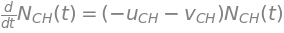

In [4]:
diffeq1 = Eq(nch(t).diff(t),  -(mu_ch+v_ch)*nch(t))
diffeq1

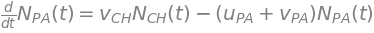

In [5]:
diffeq2 = Eq(npa(t).diff(t), v_ch*nch(t) - (mu_pa+v_pa)*npa(t))
diffeq2

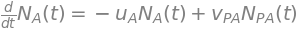

In [6]:
diffeq3 = Eq(na(t).diff(t), v_pa*npa(t) - (mu_a)*na(t))
diffeq3

### Try to solve automatically

In [7]:
help(dsolve)

Help on function dsolve in module sympy.solvers.ode.ode:

dsolve(eq, func=None, hint='default', simplify=True, ics=None, xi=None, eta=None, x0=0, n=6, **kwargs)
     Solves any (supported) kind of ordinary differential equation and
     system of ordinary differential equations.
    
     For single ordinary differential equation
    
     It is classified under this when number of equation in ``eq`` is one.
     **Usage**
    
         ``dsolve(eq, f(x), hint)`` -> Solve ordinary differential equation
         ``eq`` for function ``f(x)``, using method ``hint``.
    
     **Details**
    
         ``eq`` can be any supported ordinary differential equation (see the
             :py:mod:`~sympy.solvers.ode` docstring for supported methods).
             This can either be an :py:class:`~sympy.core.relational.Equality`,
             or an expression, which is assumed to be equal to ``0``.
    
         ``f(x)`` is a function of one variable whose derivatives in that
             variable

In [8]:
system = [diffeq1, diffeq2, diffeq3]
dsolve(system, (nch(t), npa(t), na(t)), hint='all_Integral')

### Solve by elimination

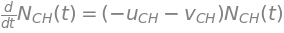

In [12]:
diffeq1

In [9]:
solvefora = Eq(na(t), solve(diffeq1, na(t)))
solvefora

SympifyError: SympifyError: []

In [10]:
solveforadiff = Eq(solvefora.lhs.diff(t), solvefora.rhs.diff(t))
solveforadiff

NameError: name 'solvefora' is not defined

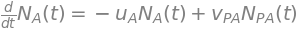

In [11]:
diffeq3

In [12]:
eq3_eliminate_a = Eq(
    diffeq3.lhs.subs(na(t).diff(t), solveforadiff.rhs),
    diffeq3.rhs.subs(na(t), solvefora.rhs)
)
eq3_eliminate_a

NameError: name 'solveforadiff' is not defined

In [13]:
solveforpa = solve(eq3_eliminate_a, npa(t))[0]
solveforpa

NameError: name 'eq3_eliminate_a' is not defined

In [14]:
solveforpa = collect(solveforpa, nch(t))
solveforpa

NameError: name 'solveforpa' is not defined

In [15]:
eq3_eliminate_a = Eq(npa(t), solveforpa)
eq3_eliminate_a

NameError: name 'solveforpa' is not defined

In [16]:
eq3_eliminate_a_diff = Eq(eq3_eliminate_a.lhs.diff(t), eq3_eliminate_a.rhs.diff(t))
eq3_eliminate_a_diff

NameError: name 'eq3_eliminate_a' is not defined

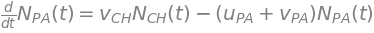

In [17]:
diffeq2

In [18]:
diffeq2_eliminate_pa = Eq(
    diffeq2.lhs.subs(npa(t).diff(t), eq3_eliminate_a_diff.rhs),
    diffeq2.rhs.subs(npa(t), eq3_eliminate_a.rhs)
)
diffeq2_eliminate_pa

NameError: name 'eq3_eliminate_a_diff' is not defined

### Now, we've converted a system of 3 linear differential equation to a single differential equation of order 3

In [193]:
elimination_solution = dsolve(diffeq2_eliminate_pa)

In [195]:
str(elimination_solution)

'Eq(N_CH(t), C1*exp(t*(u_A*u_CH/(-27*I_re*v_CH*v_PA/2 - 9*u_A**2*u_CH/2 - 9*u_A**2*u_PA/2 - 9*u_A**2*v_CH/2 - 9*u_A**2*v_PA/2 - 9*u_A*u_CH**2/2 - 9*u_A*u_CH*v_CH - 9*u_A*u_PA**2/2 - 9*u_A*u_PA*v_PA - 9*u_A*v_CH**2/2 - 9*u_A*v_PA**2/2 - 9*u_CH**2*u_PA/2 - 9*u_CH**2*v_PA/2 - 9*u_CH*u_PA**2/2 - 9*u_CH*u_PA*v_CH - 9*u_CH*u_PA*v_PA - 9*u_CH*v_CH*v_PA - 9*u_CH*v_PA**2/2 - 9*u_PA**2*v_CH/2 - 9*u_PA*v_CH**2/2 - 9*u_PA*v_CH*v_PA - 9*v_CH**2*v_PA/2 - 9*v_CH*v_PA**2/2 + sqrt(-4*(-3*u_A*u_CH - 3*u_A*u_PA - 3*u_A*v_CH - 3*u_A*v_PA - 3*u_CH*u_PA - 3*u_CH*v_PA - 3*u_PA*v_CH - 3*v_CH*v_PA + (u_A + u_CH + u_PA + v_CH + v_PA)**2)**3 + (-27*I_re*v_CH*v_PA - 9*u_A**2*u_CH - 9*u_A**2*u_PA - 9*u_A**2*v_CH - 9*u_A**2*v_PA - 9*u_A*u_CH**2 - 18*u_A*u_CH*v_CH - 9*u_A*u_PA**2 - 18*u_A*u_PA*v_PA - 9*u_A*v_CH**2 - 9*u_A*v_PA**2 - 9*u_CH**2*u_PA - 9*u_CH**2*v_PA - 9*u_CH*u_PA**2 - 18*u_CH*u_PA*v_CH - 18*u_CH*u_PA*v_PA - 18*u_CH*v_CH*v_PA - 9*u_CH*v_PA**2 - 9*u_PA**2*v_CH - 9*u_PA*v_CH**2 - 18*u_PA*v_CH*v_PA - 9*v_C

### Wow, this is wayyyy too messy. Let's see if another method can simplify it.

## Approach 3: Solve with Eigenvalues and Eigenvectors

#### init non-function symbols to get matrix

In [19]:
n_ch, n_pa, n_a = symbols('N_CH N_PA N_A')

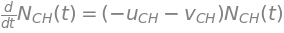

In [20]:
diffeq1

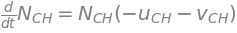

In [21]:
diffeq1_nofn = diffeq1.subs(nch(t), n_ch).subs(na(t), n_a)
diffeq1_nofn

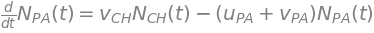

In [22]:
diffeq2

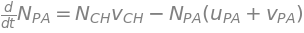

In [23]:
diffeq2_nofn = diffeq2.subs(nch(t), n_ch).subs(npa(t), n_pa)
diffeq2_nofn

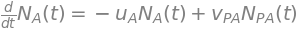

In [24]:
diffeq3

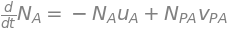

In [25]:
diffeq3_nofn = diffeq3.subs(npa(t), n_pa).subs(na(t), n_a)
diffeq3_nofn

In [26]:
A, b = linear_eq_to_matrix(
    [diffeq1_nofn.rhs, diffeq2_nofn.rhs, diffeq3_nofn.rhs], [n_ch, n_pa, n_a])
A

⎡-u_CH - v_CH        0          0  ⎤
⎢                                  ⎥
⎢    v_CH      -(u_PA + v_PA)   0  ⎥
⎢                                  ⎥
⎣     0             v_PA       -u_A⎦

In [27]:
b

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

### All eigenvals have multiplicity 1

In [41]:
A

⎡-u_CH - v_CH        0          0  ⎤
⎢                                  ⎥
⎢    v_CH      -(u_PA + v_PA)   0  ⎥
⎢                                  ⎥
⎣     0             v_PA       -u_A⎦

In [28]:
eigenvalsvects = A.eigenvects()
type(eigenvalsvects)

list

In [51]:
print(f'Eigenval with multiplicity {eigenvalsvects[0][1]}')
eigenvalsvects[0][0]

Eigenval with multiplicity 1


In [35]:
print('Corresponding Eigenvector')
eigenveeigenvalsvects[0][2]

Corresponding Eigenvector


⎡⎡0⎤⎤
⎢⎢ ⎥⎥
⎢⎢0⎥⎥
⎢⎢ ⎥⎥
⎣⎣1⎦⎦

In [37]:
print(f'Eigenval with multiplicity {eigenvalsvects[1][1]}')
eigenvalsvects[1][0]

Eigenval with multiplicity 1


In [38]:
print('Corresponding Eigenvector')
eigenvalsvects[1][2]

Corresponding Eigenvector


⎡⎡ ⎛                                                2                         
⎢⎢-⎝u_A⋅u_CH - u_A⋅u_PA + u_A⋅v_CH - u_A⋅v_PA - u_CH  + u_CH⋅u_PA - 2⋅u_CH⋅v_C
⎢⎢────────────────────────────────────────────────────────────────────────────
⎢⎢                                                         v_CH⋅v_PA          
⎢⎢                                                                            
⎢⎢                                                  -(-u_A + u_CH + v_CH)     
⎢⎢                                                  ──────────────────────    
⎢⎢                                                           v_PA             
⎢⎢                                                                            
⎣⎣                                                             1              

                                2            ⎞ ⎤⎤
H + u_CH⋅v_PA + u_PA⋅v_CH - v_CH  + v_CH⋅v_PA⎠ ⎥⎥
───────────────────────────────────────────────⎥⎥
                                               ⎥⎥
         

In [39]:
print(f'Eigenval with multiplicity {eigenvalsvects[2][1]}')
eigenvalsvects[2][0]

Eigenval with multiplicity 1


In [40]:
print('Corresponding Eigenvector')
eigenvalsvects[2][2]

Corresponding Eigenvector


⎡⎡       0       ⎤⎤
⎢⎢               ⎥⎥
⎢⎢u_A    u_PA    ⎥⎥
⎢⎢──── - ──── - 1⎥⎥
⎢⎢v_PA   v_PA    ⎥⎥
⎢⎢               ⎥⎥
⎣⎣       1       ⎦⎦

In [45]:
A

⎡-u_CH - v_CH        0          0  ⎤
⎢                                  ⎥
⎢    v_CH      -(u_PA + v_PA)   0  ⎥
⎢                                  ⎥
⎣     0             v_PA       -u_A⎦

In [49]:
(A - (eye(3) *eigenvalsvects[2][0])).nullspace()

⎡⎡       0       ⎤⎤
⎢⎢               ⎥⎥
⎢⎢u_A    u_PA    ⎥⎥
⎢⎢──── - ──── - 1⎥⎥
⎢⎢v_PA   v_PA    ⎥⎥
⎢⎢               ⎥⎥
⎣⎣       1       ⎦⎦